#### Things to learn/Practice
- Handling Missing Data 
> We can use Imputer from sklearn library
- Filling and Replacing Values
> Feature Transformation
- Removing Duplicates
> can use drop_duplicates() from pandas lib
- Detecting and Removing Outliers
> .describe() func can give us an idea about it 
- Decision Trees
> we will practice this as well focusing on max_depth

In [390]:
import pandas as pd
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
df=pd.read_csv('train.csv')

In [283]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [284]:
print(df['Pclass'].unique())
print(df['Parch'].unique())
print(df['SibSp'].unique())

[3 1 2]
[0 1 2 5 3 4 6]
[1 0 3 4 2 5 8]


In [285]:
df['Fare'].max(),df['Fare'].min()

(512.3292, 0.0)

In [286]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [287]:
## here we gonna use imputers for Age,Embarked

In [288]:
df.drop_duplicates(inplace=True)

In [289]:
df.duplicated().sum()

0

## Imputer (for missing vals)

In [372]:

from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(strategy='mean')

# Fit and transform the 'Age' column
df['Age'] = imputer_mean.fit_transform(df[['Age']])

print("DataFrame after mean imputation:")
print(df)

DataFrame after mean imputation:
     Survived  Pclass     Sex        Age  SibSp  Parch    Fare Embarked
0           0       3    male  22.000000      1      0   7.925        S
1           1       1  female  38.000000      1      0  31.275        C
2           1       3  female  26.000000      0      0   7.925        S
3           1       1  female  35.000000      1      0  31.275        S
4           0       3    male  35.000000      0      0   8.050        S
..        ...     ...     ...        ...    ...    ...     ...      ...
886         0       2    male  27.000000      0      0  13.000        S
887         1       1  female  19.000000      0      0  30.000        S
888         0       3  female  29.699118      1      2  23.450        S
889         1       1    male  26.000000      0      0  30.000        C
890         0       3    male  32.000000      0      0   7.925        Q

[876 rows x 8 columns]


In [291]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [292]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [293]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S



- Imputer for Age col as there are many missing vals
- Imputer for Embarked as it has 2 values missing (most frequent option)
- OnehotEncoder for nominal cols (sex ,emabarked)
- Scaling for uniform range for all cols
- feature selection (not taking all cols)

In [294]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [295]:
impute_trf = ColumnTransformer([
    ('impute_age', SimpleImputer(), [2]),
    ('impute_embarked', SimpleImputer(strategy='most_frequent'), [6])
], remainder='passthrough')

# One hot encoding
encode_trf = ColumnTransformer([
    ('ohe_sex_embarked', OneHotEncoder(sparse=False, handle_unknown='ignore'), [1, 6])
], remainder='passthrough')

# Scaling
scale_trf = ColumnTransformer([
    ('scale', MinMaxScaler(), slice(0, 10))
])

# Feature selection
feature_trf = SelectKBest(score_func=chi2, k=8)

# Train the model
model_trf = DecisionTreeClassifier()

# Create Pipeline
pipe = Pipeline([
    ('trf1', impute_trf),
    ('trf2', encode_trf),
    ('trf3', scale_trf),
    ('trf4', feature_trf),
    ('trf5', model_trf)
])

# Alternate syntax
# pipe = make_pipeline(trf1, trf2, trf3, trf4, trf5)

# Train the pipeline
pipe.fit(X_train, y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x00000214C6A228E0>)),
                ('trf5', DecisionTreeClassifier())])

In [296]:
from sklearn import set_config
set_config(display='diagram')

In [297]:
y_pred=pipe.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6256983240223464

In [298]:
# cv=5 5 diff time train/test split aata ha then wo mean of accuracy
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

0.6391214419383433

In [299]:
params={'trf5__max_depth':[1,2,3,4,5,None]}

In [300]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(pipe,params,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `spa

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x00000214C6A228E0>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [301]:
grid.best_score_

0.6391214419383433

In [302]:
grid.best_params_

{'trf5__max_depth': 2}

#### Detecting and Removing Outliers

- Outlier detection using IQR

Percentile
 Age (1,98,28,39)
    100 %(percentile) is 98 as the highest(max val)
    0% is the min val -> 1

>(IQR PROXIMITY FORMULAS)
- Minimun (Q1-.5*IQR)
- Maximum (Q3+1.5*IQR)

- Q1 ->25th percentile
- Q3 ->75th percentile
- IQR -> 75th % - 25th%


- Next the values behind those max min wiskers are considered as outliers

In [303]:
df_new = df[['Age', 'Fare', 'SibSp']]
df_new.shape

(891, 3)

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns

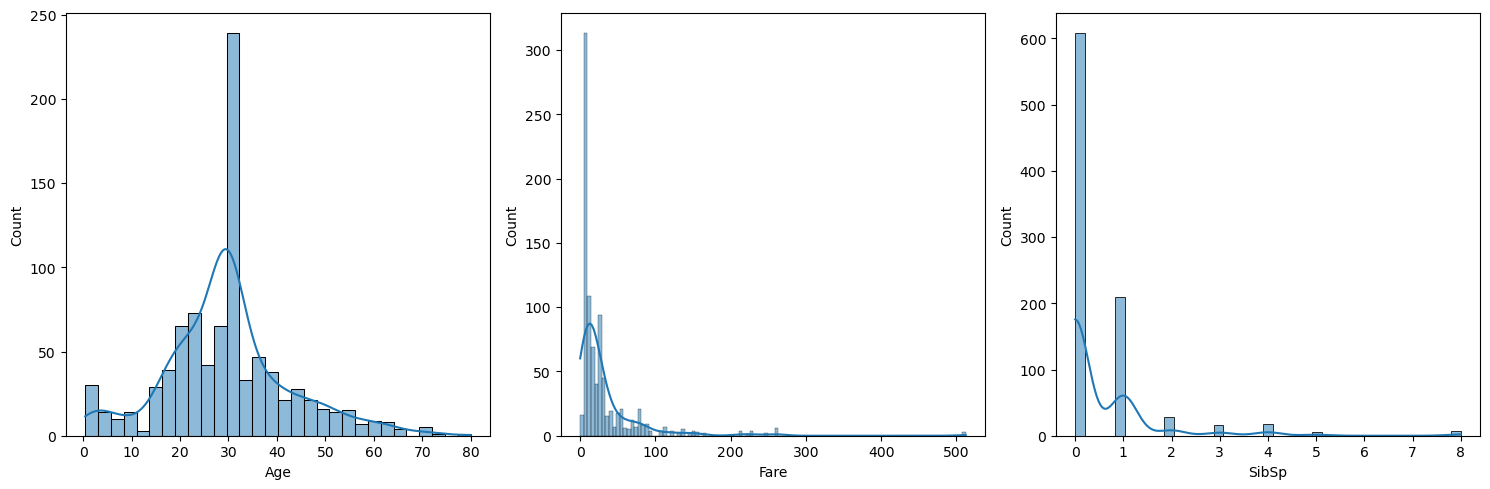

In [305]:
plt.figure(figsize=(15, 5))  

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True) 
plt.subplot(1, 3, 2)
sns.histplot(df['Fare'], kde=True)  

plt.subplot(1, 3, 3)
sns.histplot(df['SibSp'], kde=True)  

plt.tight_layout()
plt.show()

- Age is normally distributed
- Fare isn't normally distributed
- SibSp isn't normally distributed

In [306]:
# or we can check it too
df[['Fare','SibSp','Age']].skew()

Fare     4.787317
SibSp    3.695352
Age      0.434488
dtype: float64

In [307]:
df[['Fare','SibSp','Age']].describe()

,Fare,SibSp,Age
count,891.000000,891.000000,891.000000
mean,32.204208,0.523008,29.699118
std,49.693429,1.102743,13.002015
min,0.000000,0.000000,0.420000
25%,7.910400,0.000000,22.000000
50%,14.454200,0.000000,29.699118
75%,31.000000,1.000000,35.000000
max,512.329200,8.000000,80.000000


<Axes: >

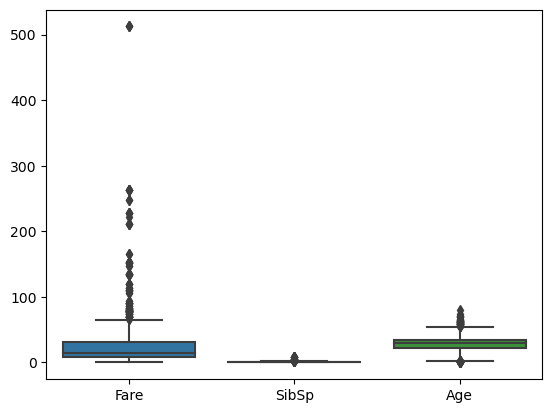

In [308]:
sns.boxplot(df[['Fare','SibSp','Age']])

- all of the data which is outside the line you can see are outliers

In [309]:
percentile25_Age = df['Age'].quantile(0.25)
percentile75_Age = df['Age'].quantile(0.75)

In [310]:
zero_fare=df['Fare'] <= 0

In [311]:
zero_fare.sum()

15

In [312]:
zero_fare = df['Fare'] <= 0

# Drop the rows where the Fare is zero or negative
df = df[~zero_fare]

# Check the result
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [313]:
zero_fare.sum()

15

In [314]:
percentile25_fare = df['Fare'].quantile(0.25)
percentile75_fare = df['Fare'].quantile(0.75)

percentile25_sibsp = df['SibSp'].quantile(0.25)
percentile75_sibsp = df['SibSp'].quantile(0.75)

In [315]:
iqr_age = percentile75_Age - percentile25_Age
iqr_fare = percentile75_fare - percentile25_fare
iqr_sib = percentile75_sibsp - percentile25_sibsp

In [316]:
upper_limit_max_age = percentile75_Age + 1.5 * iqr_age
lower_limit_min_age = percentile25_Age - 1.5 * iqr_age


upper_limit_max_fare = percentile75_fare + 1.5 * iqr_fare
lower_limit_min_fare = percentile25_fare - 1.5 * iqr_fare

upper_limit_max_sib = percentile75_sibsp + 1.5 * iqr_sib
lower_limit_min_sib = percentile25_sibsp - 1.5 * iqr_sib

In [317]:
print("Upper limit",upper_limit_max_age,upper_limit_max_fare,upper_limit_max_sib)
print("Lower limit",lower_limit_min_age,lower_limit_min_fare,lower_limit_min_sib)

Upper limit 54.5 66.3 2.5
Lower limit 2.5 -27.099999999999998 -1.5


## Finding outliers now

In [318]:
df[df['Age'] > upper_limit_max_age]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
11,1,1,female,58.0,0,0,26.5500,S
15,1,2,female,55.0,0,0,16.0000,S
33,0,2,male,66.0,0,0,10.5000,S
54,0,1,male,65.0,0,1,61.9792,C
94,0,3,male,59.0,0,0,7.2500,S
96,0,1,male,71.0,0,0,34.6542,C
116,0,3,male,70.5,0,0,7.7500,Q
152,0,3,male,55.5,0,0,8.0500,S
170,0,1,male,61.0,0,0,33.5000,S
174,0,1,male,56.0,0,0,30.6958,C


In [319]:
df[df['Fare'] > upper_limit_max_fare]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.000000,1,0,71.2833,C
27,0,1,male,19.000000,3,2,263.0000,S
31,1,1,female,29.699118,1,0,146.5208,C
34,0,1,male,28.000000,1,0,82.1708,C
52,1,1,female,49.000000,1,0,76.7292,C
...,...,...,...,...,...,...,...,...
846,0,3,male,29.699118,8,2,69.5500,S
849,1,1,female,29.699118,1,0,89.1042,C
856,1,1,female,45.000000,1,1,164.8667,S
863,0,3,female,29.699118,8,2,69.5500,S


In [320]:
df[df['SibSp'] > upper_limit_max_sib]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,male,2.000000,3,1,21.0750,S
16,0,3,male,2.000000,4,1,29.1250,Q
24,0,3,female,8.000000,3,1,21.0750,S
27,0,1,male,19.000000,3,2,263.0000,S
50,0,3,male,7.000000,4,1,39.6875,S
59,0,3,male,11.000000,5,2,46.9000,S
63,0,3,male,4.000000,3,2,27.9000,S
68,1,3,female,17.000000,4,2,7.9250,S
71,0,3,female,16.000000,5,2,46.9000,S
85,1,3,female,33.000000,3,0,15.8500,S


In [321]:
df[df['Age'] < lower_limit_min_age]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,male,2.00,3,1,21.0750,S
16,0,3,male,2.00,4,1,29.1250,Q
78,1,2,male,0.83,0,2,29.0000,S
119,0,3,female,2.00,4,2,31.2750,S
164,0,3,male,1.00,4,1,39.6875,S
172,1,3,female,1.00,1,1,11.1333,S
183,1,2,male,1.00,2,1,39.0000,S
205,0,3,female,2.00,0,1,10.4625,S
297,0,1,female,2.00,1,2,151.5500,S
305,1,1,male,0.92,1,2,151.5500,S


In [322]:
df[df['Fare'] < lower_limit_min_fare]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [323]:
df[df['SibSp'] < lower_limit_min_sib]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


## Now Trimming or cutting off those outliers

In [324]:
new_df = df[
    (df['Age'] >= lower_limit_min_age) & (df['Age'] <= upper_limit_max_age) &
    (df['Fare'] >= lower_limit_min_fare) & (df['Fare'] <= upper_limit_max_fare) &
    (df['SibSp'] >= lower_limit_min_sib) & (df['SibSp'] <= upper_limit_max_sib)
]

print(new_df.shape)

(677, 8)


In [325]:
new_df_age = df[df['Age'] < upper_limit_max_age]

C:\Users\DELL\AppData\Local\Temp\ipykernel_3376\4056631524.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_3376\4056631524.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_age['Age'])


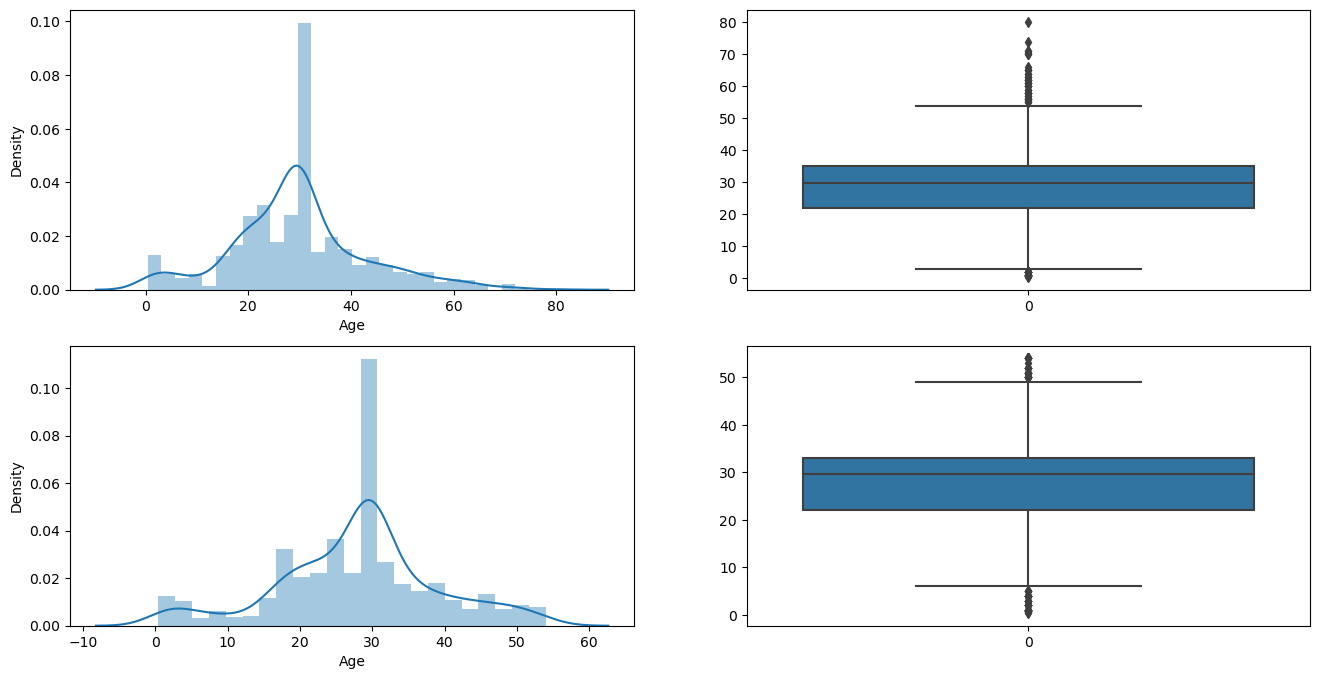

In [326]:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Age'])

plt.subplot(2,2,2)
sns.boxplot(df['Age'])

plt.subplot(2,2,3)
sns.distplot(new_df_age['Age'])

plt.subplot(2,2,4)
sns.boxplot(new_df_age['Age'])

plt.show()

In [327]:
new_df_fare = df[df['Fare'] < upper_limit_max_fare]

C:\Users\DELL\AppData\Local\Temp\ipykernel_3376\2567152318.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_3376\2567152318.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_fare['Fare'])


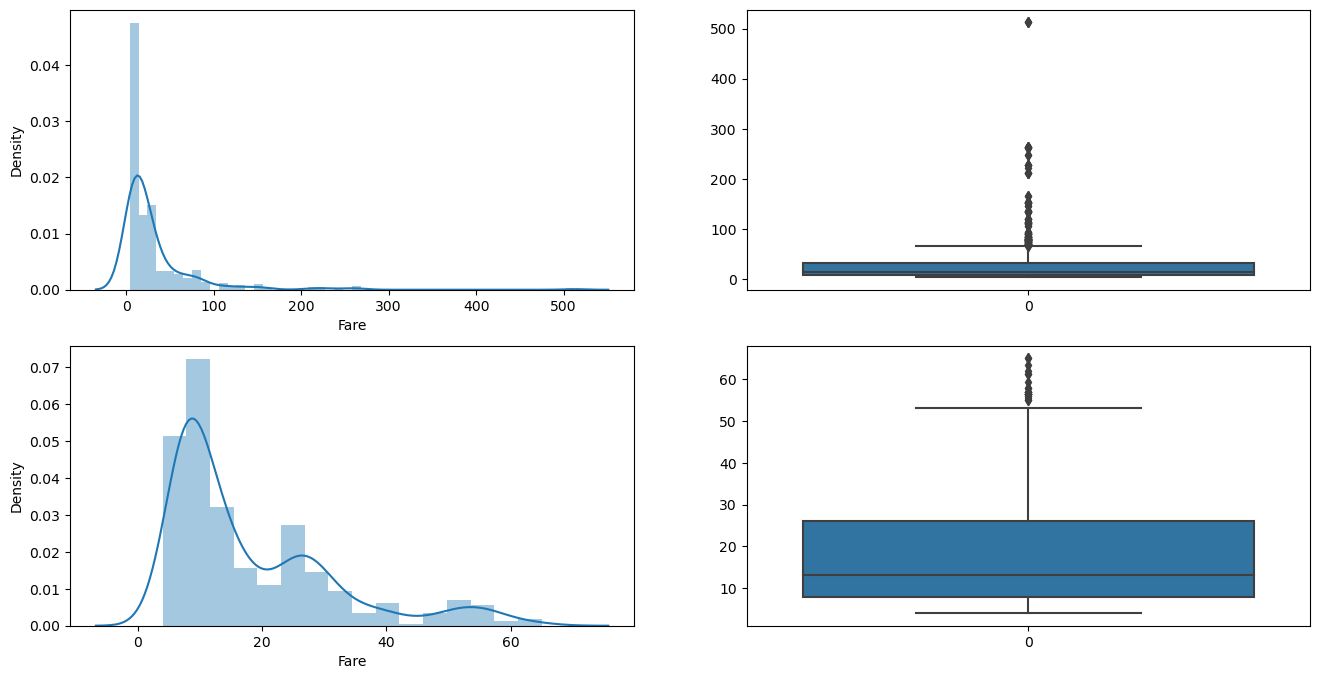

In [328]:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Fare'])

plt.subplot(2,2,2)
sns.boxplot(df['Fare'])

plt.subplot(2,2,3)
sns.distplot(new_df_fare['Fare'])

plt.subplot(2,2,4)
sns.boxplot(new_df_fare['Fare'])

plt.show()

In [329]:
new_df_sib=df[df['SibSp'] < upper_limit_max_sib]

C:\Users\DELL\AppData\Local\Temp\ipykernel_3376\667478324.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SibSp'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_3376\667478324.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_sib['SibSp'])


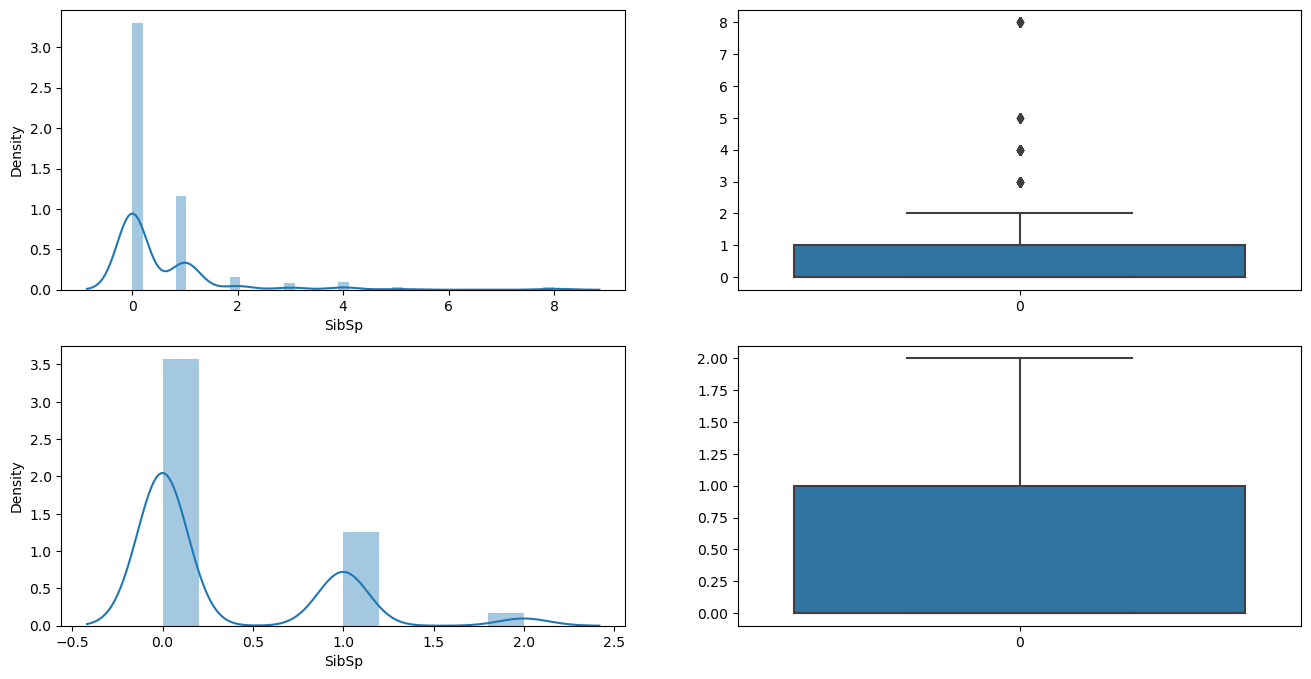

In [330]:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['SibSp'])

plt.subplot(2,2,2)
sns.boxplot(df['SibSp'])

plt.subplot(2,2,3)
sns.distplot(new_df_sib['SibSp'])

plt.subplot(2,2,4)
sns.boxplot(new_df_sib['SibSp'])

plt.show()

### Capping

In [331]:
new_df_cap_age = df.copy()

new_df_cap['Age'] = np.where(
    new_df_cap['Age'] > upper_limit_max_age,
    upper_limit_max_age,
    np.where(
        new_df_cap['Age'] < lower_limit_min_age,
        lower_limit_min_age,
        new_df_cap['Age']
    )
)


In [332]:
new_df_cap_fare = df.copy()

new_df_cap['Fare'] = np.where(
    new_df_cap['Fare'] > upper_limit_max_fare,
    upper_limit_max_fare,
    np.where(
        new_df_cap['Fare'] < lower_limit_min_fare,
        lower_limit_min_fare,
        new_df_cap['Fare']
    )
)


In [333]:
new_df_cap_sibsp = df.copy()

new_df_cap['SibSp'] = np.where(
    new_df_cap['SibSp'] > upper_limit_max_sib,
    upper_limit_max_sib,
    np.where(
        new_df_cap['SibSp'] < lower_limit_min_sib,
        lower_limit_min_sib,
        new_df_cap['SibSp']
    )
)


In [334]:

new_df_cap_age.shape,new_df_cap_fare.shape,new_df_cap_sibsp.shape

((876, 8), (876, 8), (876, 8))

C:\Users\DELL\AppData\Local\Temp\ipykernel_3376\3454823087.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_3376\3454823087.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap_age['Age'])


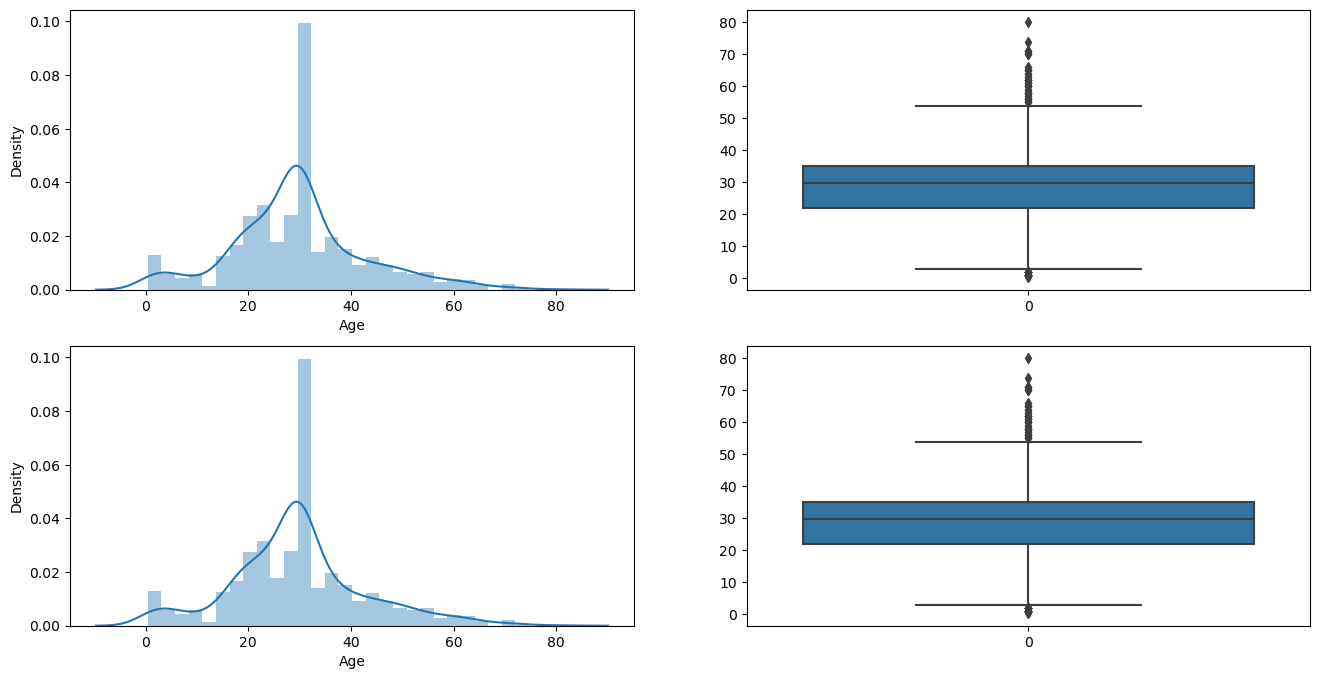

In [335]:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Age'])

plt.subplot(2,2,2)
sns.boxplot(df['Age'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap_age['Age'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap_age['Age'])

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3376\1677581662.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_3376\1677581662.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap_fare['Fare'])


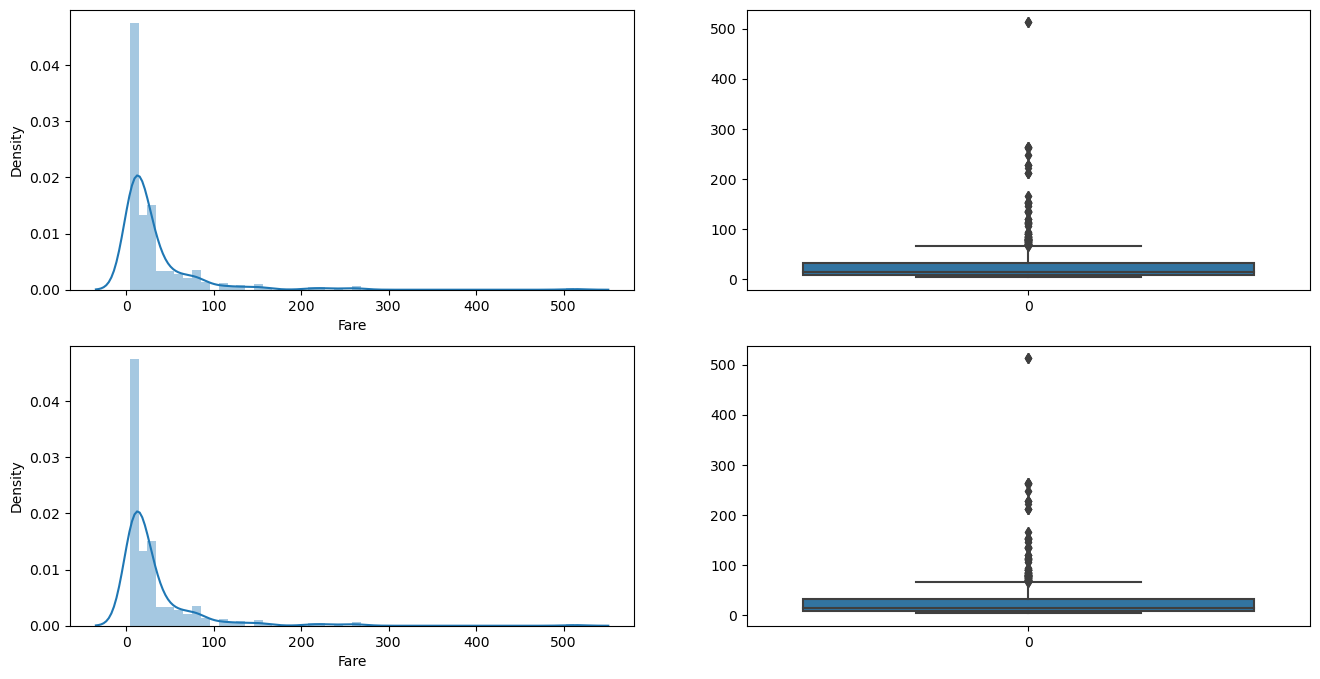

In [336]:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Fare'])

plt.subplot(2,2,2)
sns.boxplot(df['Fare'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap_fare['Fare'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap_fare['Fare'])

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3376\3133238134.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SibSp'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_3376\3133238134.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap_sibsp['SibSp'])


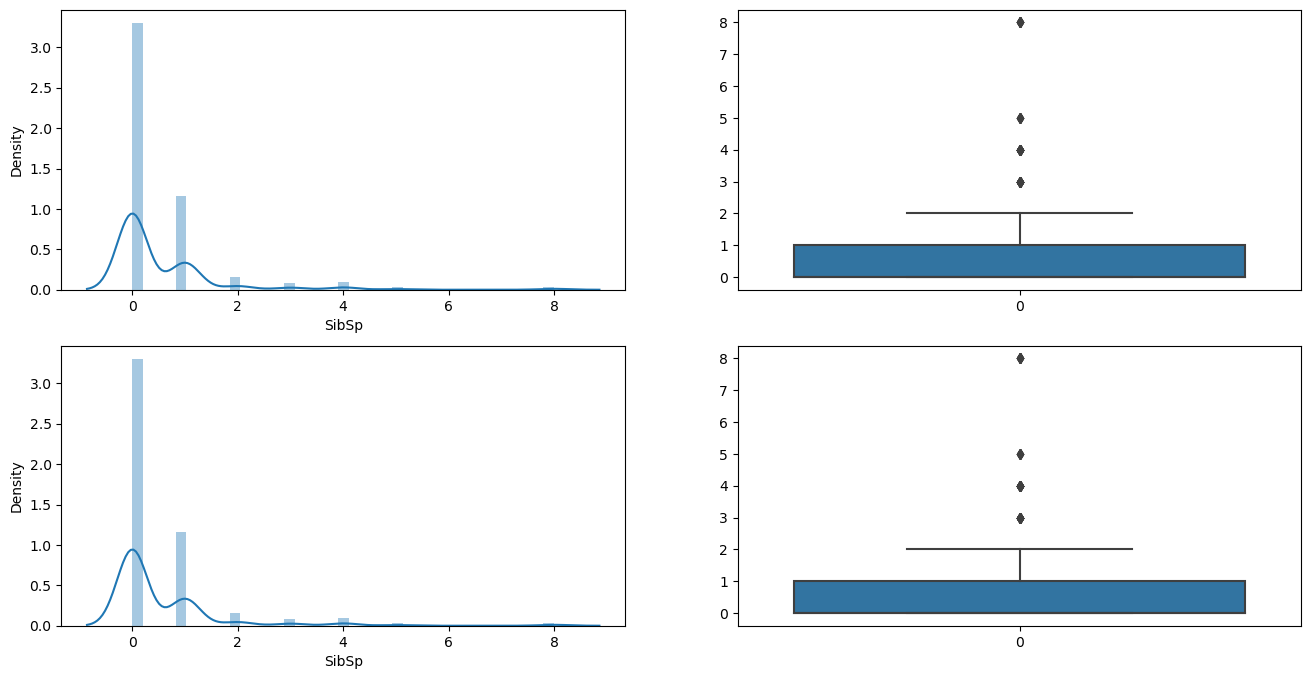

In [337]:

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['SibSp'])

plt.subplot(2,2,2)
sns.boxplot(df['SibSp'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap_sibsp['SibSp'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap_sibsp['SibSp'])

plt.show()

### Winsorization Technique

In [338]:
df_fare.quantile(0.95)

113.275

<Axes: >

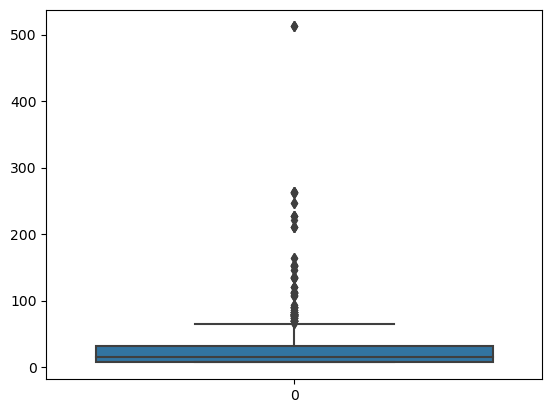

In [339]:
sns.boxplot(df_fare)

In [340]:
df = df[df['Fare'] != 0]

print(df['Fare'].describe())

count    876.000000
mean      32.755650
std       49.936826
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64


In [341]:
upper_limit,lower_limit

(113.275, 7.2292)

- so i can remove these zero vals 
- infor from the internet
- How Much Were The Titanic Tickets?
- Titanic ticket prices used to range from as low as £7 ($35) to as high as £857 ($4,350). First Class Suite ticket was £870 ($4,350), First Class Berth was £30 ($150), Second Class was £12 ($60), and Third Class was £7 ($35).

In [343]:
df['Fare'] = df['Fare'].apply(lambda x: max(x, 7))

# Verify changes
print(df['Fare'].describe())

count    876.000000
mean      32.765482
std       49.931579
min        7.000000
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64


In [344]:
lower_limit = df['Fare'].quantile(0.05)
upper_limit = df['Fare'].quantile(0.95)


In [345]:
lower_limit,upper_limit

(7.2292, 113.275)

<Axes: >

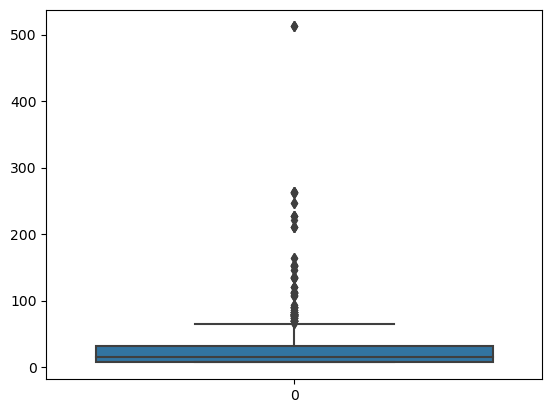

In [346]:
sns.boxplot(df['Fare'])

In [347]:
df_fare.describe()

count    876.000000
mean      32.765482
std       49.931579
min        7.000000
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

C:\Users\DELL\AppData\Local\Temp\ipykernel_3376\3425841524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

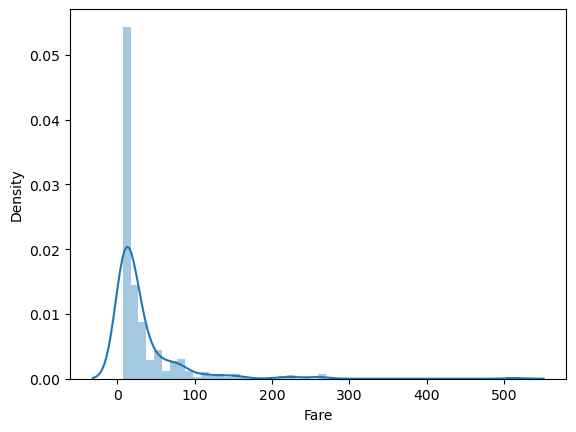

In [348]:
sns.distplot(df['Fare'])

In [349]:
df[(df['Fare'] <= 512.0) & (df['Fare'] >= 7.0)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


<Axes: >

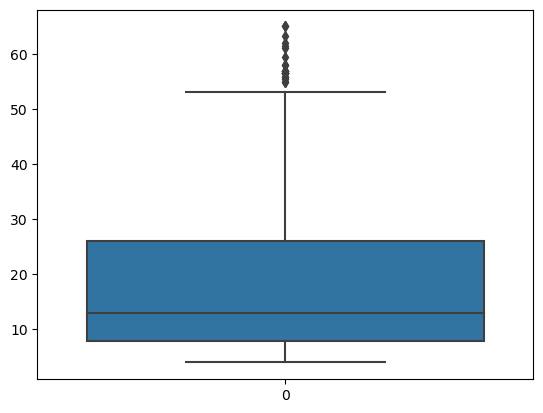

In [350]:
sns.boxplot(new_df_fare['Fare'])

In [351]:
new_df_fare=df[(df['Fare'] <= 113.275) & (df['Fare'] >= 7.2292 )]

<Axes: >

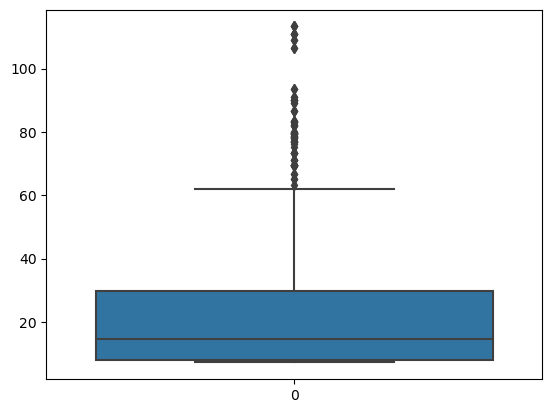

In [352]:
sns.boxplot(new_df_fare['Fare'])

In [353]:
new_df_fare.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,0.382872,2.352645,29.543215,0.547859,0.376574,24.836250
std,0.486394,0.807640,13.178931,1.141160,0.805408,23.187302
min,0.000000,1.000000,0.420000,0.000000,0.000000,7.229200
25%,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.500000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,29.700000
max,1.000000,3.000000,80.000000,8.000000,6.000000,113.275000


C:\Users\DELL\AppData\Local\Temp\ipykernel_3376\457594178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_fare['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

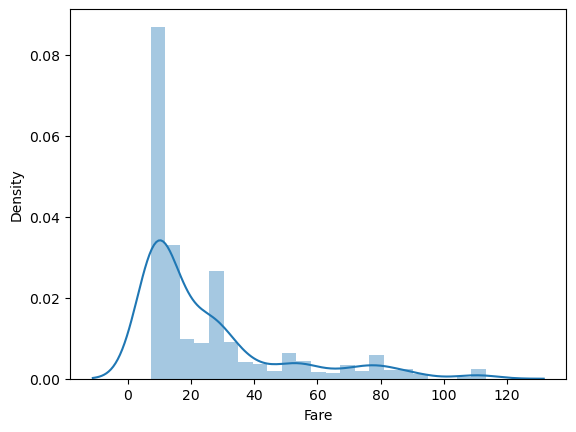

In [354]:
sns.distplot(new_df_fare['Fare'])

<Axes: >

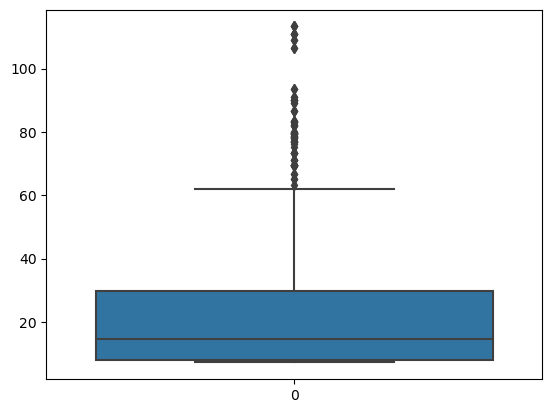

In [355]:
sns.boxplot(new_df_fare['Fare'])

count    876.000000
mean      18.299419
std        9.888334
min        7.925000
25%        7.925000
50%       14.500000
75%       31.275000
max       31.275000
Name: Fare, dtype: float64


C:\Users\DELL\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\DELL\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\DELL\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


<Axes: >

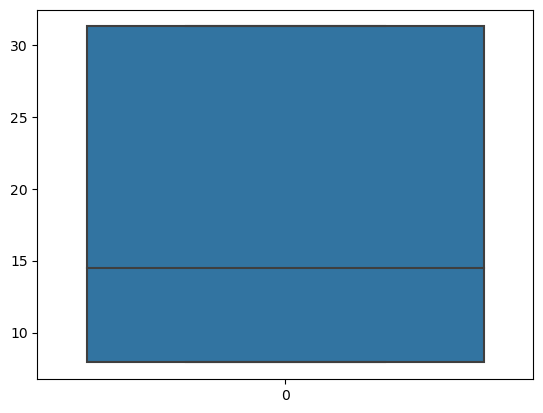

In [371]:
lower_limit = df['Fare'].quantile(0.15)
upper_limit = df['Fare'].quantile(0.85)

# Apply winsorization
df['Fare'] = stats.mstats.winsorize(df['Fare'], limits=[0.15, 0.15])

# Verify changes
print(df['Fare'].describe())
sns.boxplot(df['Fare'])

In [367]:
lower_limit = df['Fare'].quantile(0.02)
upper_limit = df['Fare'].quantile(0.98)

# Apply winsorization
df['Fare'] = stats.mstats.winsorize(df['Fare'], limits=[0.02, 0.02])

# Verify changes
print(df['Fare'].describe())


count    876.000000
mean      18.299419
std        9.888334
min        7.925000
25%        7.925000
50%       14.500000
75%       31.275000
max       31.275000
Name: Fare, dtype: float64


C:\Users\DELL\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\DELL\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\DELL\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


<Axes: >

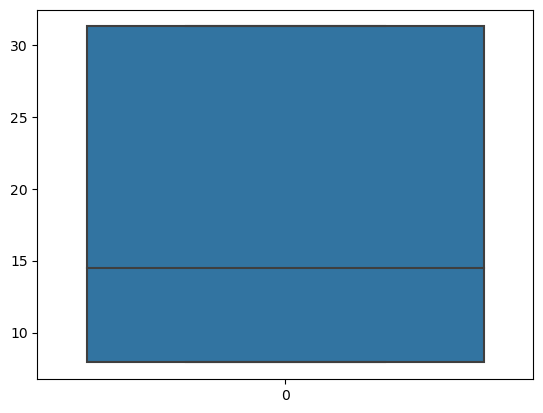

In [368]:
sns.boxplot(df['Fare'])

In [376]:
df['Fare']

0       7.925
1      31.275
2       7.925
3      31.275
4       8.050
        ...  
886    13.000
887    30.000
888    23.450
889    30.000
890     7.925
Name: Fare, Length: 876, dtype: float64

In [379]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [381]:
df = df[df['Fare'] != 0]

In [391]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [396]:
fare_upper_limit=df['Fare'].quantile(0.85)
fare_lower_limit=df['Fare'].quantile(0.15)
fare_lower_limit,fare_upper_limit

(7.75, 56.4958)

In [397]:
df['Fare']=np.where(df['Fare']>=fare_upper_limit,
        fare_upper_limit,
        np.where (df['Fare']<= fare_lower_limit,
        fare_lower_limit,
        df['Fare']))

C:\Users\DELL\AppData\Local\Temp\ipykernel_3376\3213797599.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

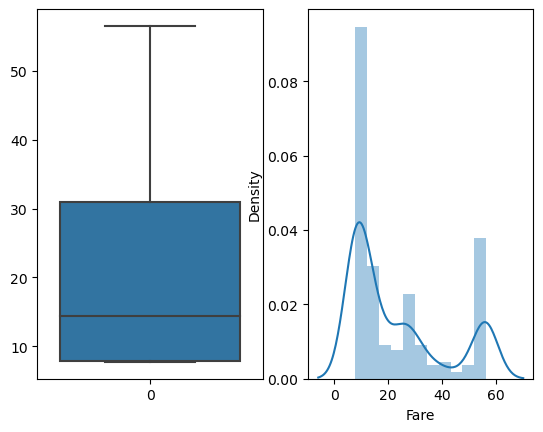

In [399]:
plt.subplot(1,2,1)
sns.boxplot(df['Fare'])


plt.subplot(1,2,2)
sns.distplot(df['Fare'])

In [ ]:
df['F']